### original image

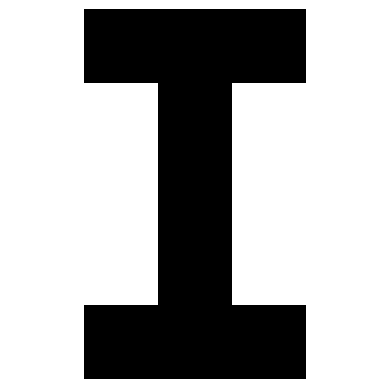

In [109]:
import matplotlib.pyplot as plt
import numpy as np

matrix = np.array([
    [1, 0, 0, 0, 1],
    [1, 1, 0, 1, 1],
    [1, 1, 0, 1, 1],
    [1, 1, 0, 1, 1],
    [1, 0, 0, 0, 1],
])

plt.imshow(matrix, cmap='gray')
plt.axis('off')
plt.show()


In [110]:
pattern = matrix.flatten()
pattern = pattern * 2 - 1

### learning pattern of image

In [111]:
z = np.outer(pattern, pattern)
np.fill_diagonal(z, 0)
z

array([[ 0, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
         1, -1,  1,  1,  1, -1, -1, -1,  1],
       [-1,  0,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        -1,  1, -1, -1, -1,  1,  1,  1, -1],
       [-1,  1,  0,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        -1,  1, -1, -1, -1,  1,  1,  1, -1],
       [-1,  1,  1,  0, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        -1,  1, -1, -1, -1,  1,  1,  1, -1],
       [ 1, -1, -1, -1,  0,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
         1, -1,  1,  1,  1, -1, -1, -1,  1],
       [ 1, -1, -1, -1,  1,  0,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
         1, -1,  1,  1,  1, -1, -1, -1,  1],
       [ 1, -1, -1, -1,  1,  1,  0, -1,  1,  1,  1,  1, -1,  1,  1,  1,
         1, -1,  1,  1,  1, -1, -1, -1,  1],
       [-1,  1,  1,  1, -1, -1, -1,  0, -1, -1, -1, -1,  1, -1, -1, -1,
        -1,  1, -1, -1, -1,  1,  1,  1, -1],
       [ 1, -1, -1, -1,  1,  1,  1, -1,  0,  1,  1,  1, -1,  1, 

### distorted image

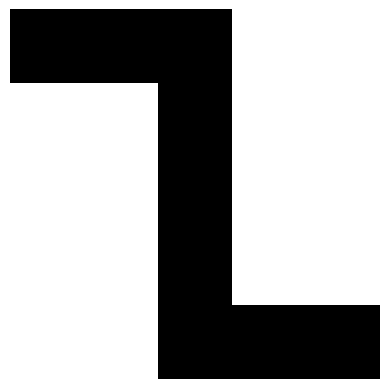

In [112]:
distort = np.array([
    [0, 0, 0, 1, 1],
    [1, 1, 0, 1, 1],
    [1, 1, 0, 1, 1],
    [1, 1, 0, 1, 1],
    [1, 1, 0, 0, 0],
])

plt.imshow(distort, cmap='gray')
plt.axis('off')
plt.show()

In [113]:
y = distort.flatten()
y = y * 2 - 1

### sign function

In [114]:
def sign(x):
    return 1 if x >= 0 else -1

### learning for all 25 pixels

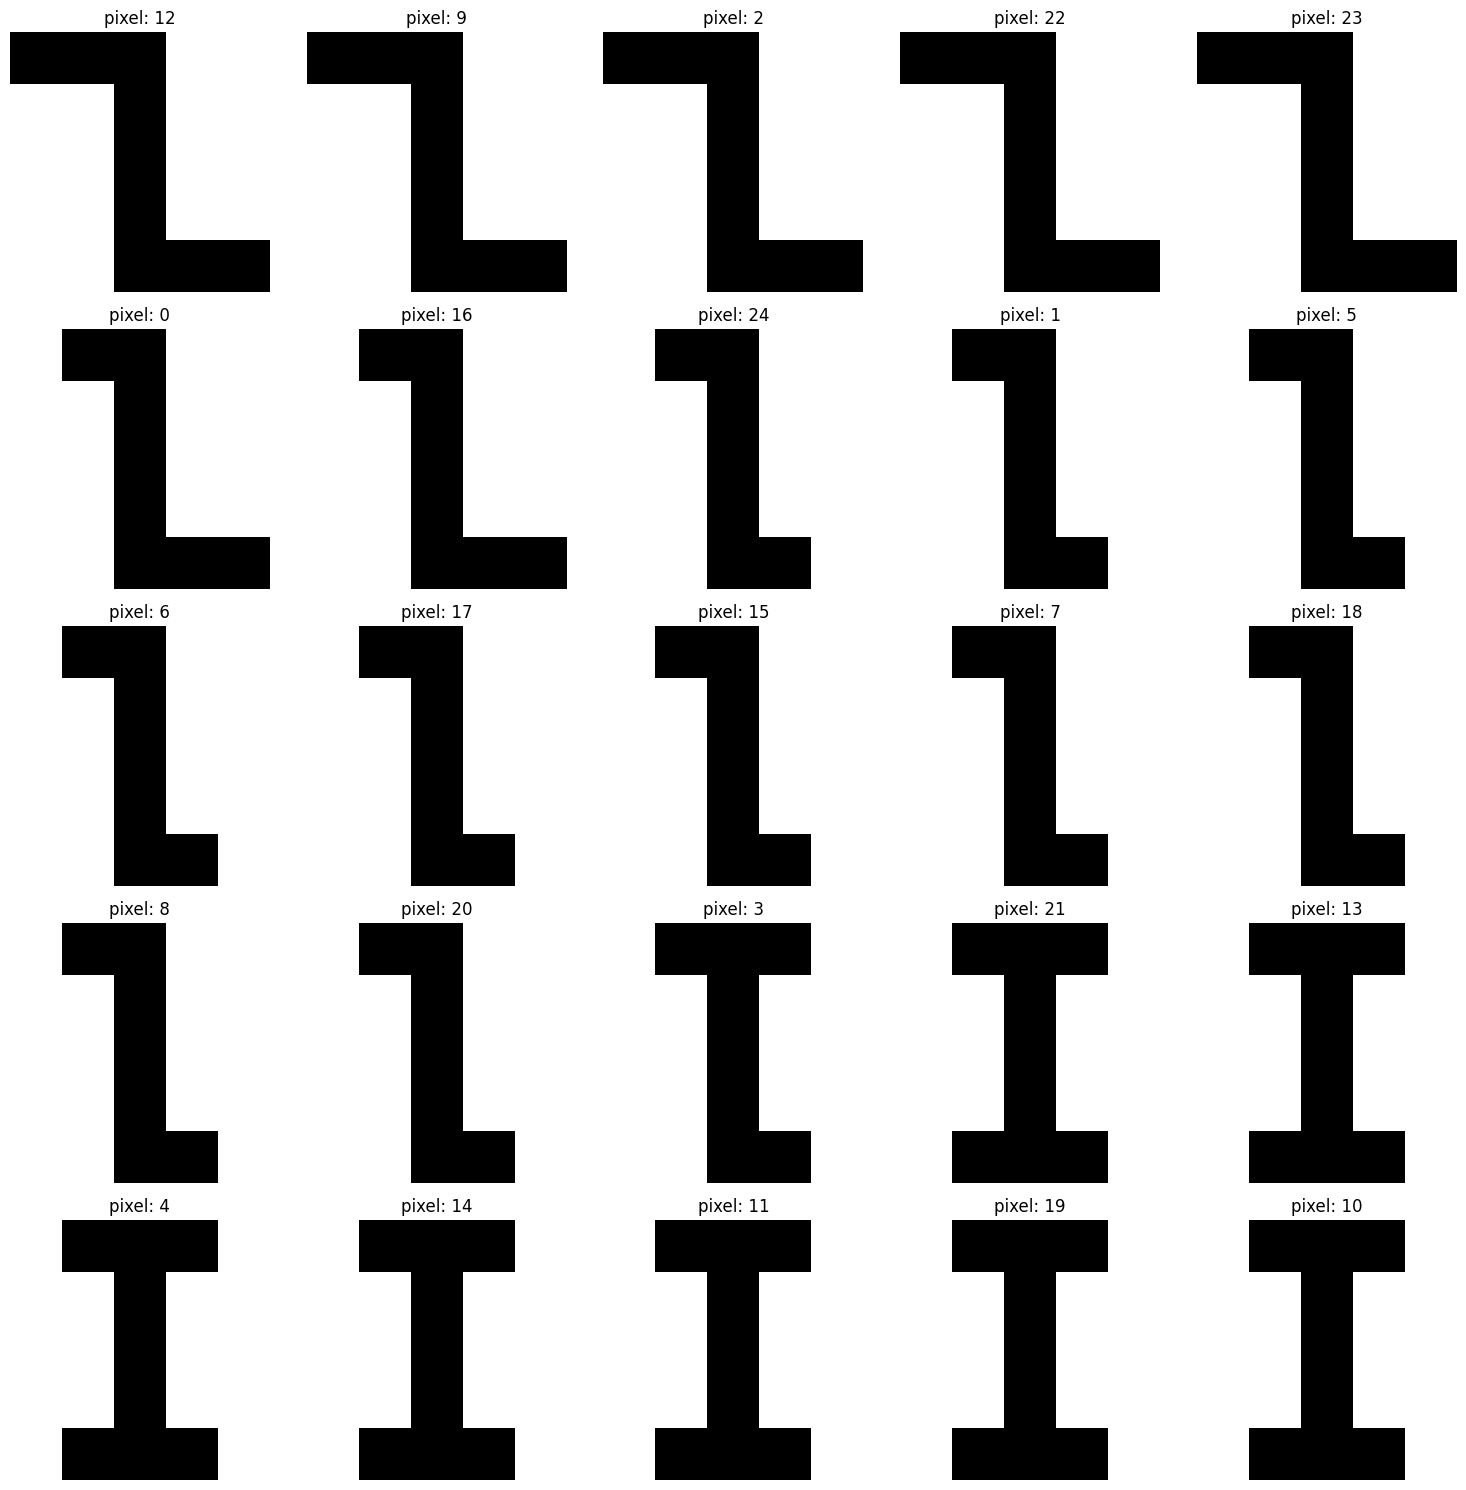

In [115]:
import numpy as np
import matplotlib.pyplot as plt

for _ in range(1):
    idx = np.random.permutation(len(y))
    fig, axes = plt.subplots(nrows=(len(idx) + 4)//5, ncols=5, figsize=(15, 3*((len(idx)+4)//5)))
    axes = axes.flatten()
    
    for j, i in enumerate(idx):
        y[i] = np.sign(np.dot(z[i], y))
        recovered = y.reshape((5, 5))
        recovered = (recovered + 1) // 2
        
        axes[j].imshow(recovered, cmap='gray')
        axes[j].set_title(f"pixel: {i}")
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


In [116]:
y

array([ 1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1,  1])

### final recovered image

In [117]:
recovered = y.reshape((5, 5))
recovered = (recovered + 1) // 2
recovered

array([[1, 0, 0, 0, 1],
       [1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1],
       [1, 0, 0, 0, 1]])

(np.float64(-0.5), np.float64(4.5), np.float64(4.5), np.float64(-0.5))

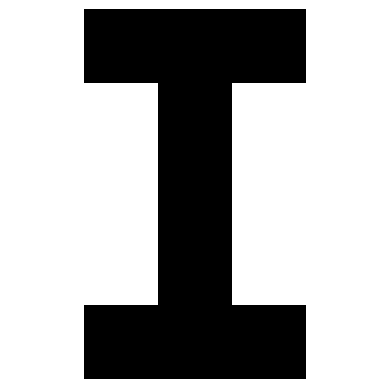

In [118]:
plt.imshow(recovered, cmap='gray')
plt.axis('off')